索引是：0, 文件路径是：./4-100001.csv
索引是：1, 文件路径是：./4-100002.csv
索引是：2, 文件路径是：./4-100003.csv
索引是：3, 文件路径是：./4-100004.csv
索引是：4, 文件路径是：./4-100005.csv


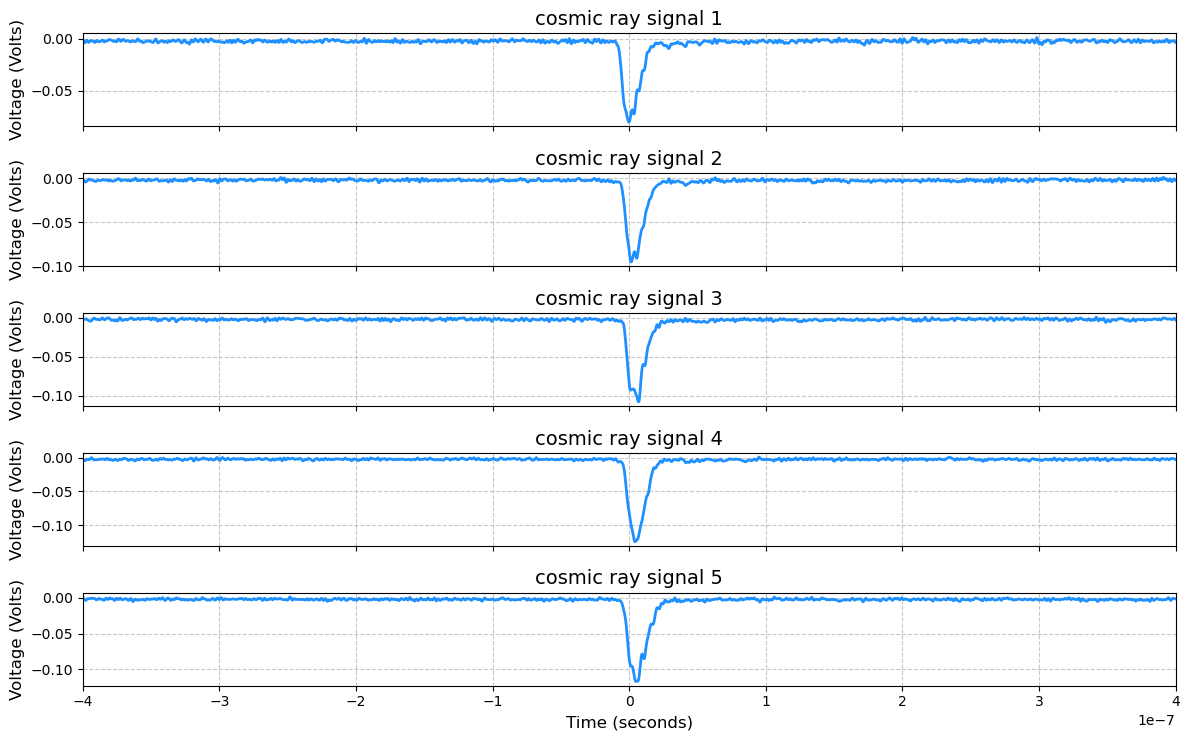

In [ ]:
import pandas as pd #dataFrame
import matplotlib.pyplot as plt
import re #regular expression library for string matching and splitting

#List file_paths
file_paths = ['./4-100001.csv', './4-100002.csv', './4-100003.csv', './4-100004.csv', './4-100005.csv']

#sharex=True  subgraph shares the X-axis
fig, axs = plt.subplots(len(file_paths), 1, figsize=(12, 1.5 * len(file_paths)), sharex=True)

#enumerate adds an index (counter) to traversable objects (lists, strings)
for i, file_path in enumerate(file_paths):
    print(f"索引是：{i}, 文件路径是：{file_path}")
    ##open() function opens a file and returns a file object; readlines() is the method of this file object
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Extract all rows after "Data:"
    data_start = False
    data_lines = []
    for line in lines:
        if line.startswith("Data:"):
            data_start = True
            continue #Skip the "Data:" line
        if data_start == True:
            if line.strip():    #If the current line is not blank after whitespace is removed 
                #strip() strips whitespace characters (Spaces, tabs, newlines) from the beginning and end of a string
                data_lines.append(line.strip())
    
    # Convert the data to a DataFrame
    #"1.0, 2.5" → ["1.0", " 2.5"] → [1.0, 2.5]
    #"3.1, 4.2" → ["3.1", " 4.2"] → [3.1, 4.2]
    #"5.0, 6.1" → ["5.0", " 6.1"] → [5.0, 6.1]
    #data = [[1.0, 2.5], [3.1, 4.2], [5.0, 6.1]]


    data = [list(map(float, re.split(r',', line))) for line in data_lines]
    
    
    #     X    Y
    # 0  1.0  2.5
    # 1  3.1  4.2
    # 2  5.0  6.1
    df = pd.DataFrame(data, columns=['X', 'Y'])


    axs[i].plot(df['X'], df['Y'], label=f'Data from {file_path}', linewidth=2, color='dodgerblue')
    axs[i].set_title(f'cosmic ray signal {i+1}', fontsize=14)
    axs[i].set_ylabel('Voltage (Volts)', fontsize=12)
    axs[i].grid(True, linestyle='--', alpha=0.7)
    axs[i].set_xlim(-4e-7, 4e-7)

# Set x-axis label only on the bottom subplot
axs[-1].set_xlabel('Time (seconds)', fontsize=12)
plt.tight_layout()
plt.savefig('optimized_plot.png', dpi=300)
plt.show()

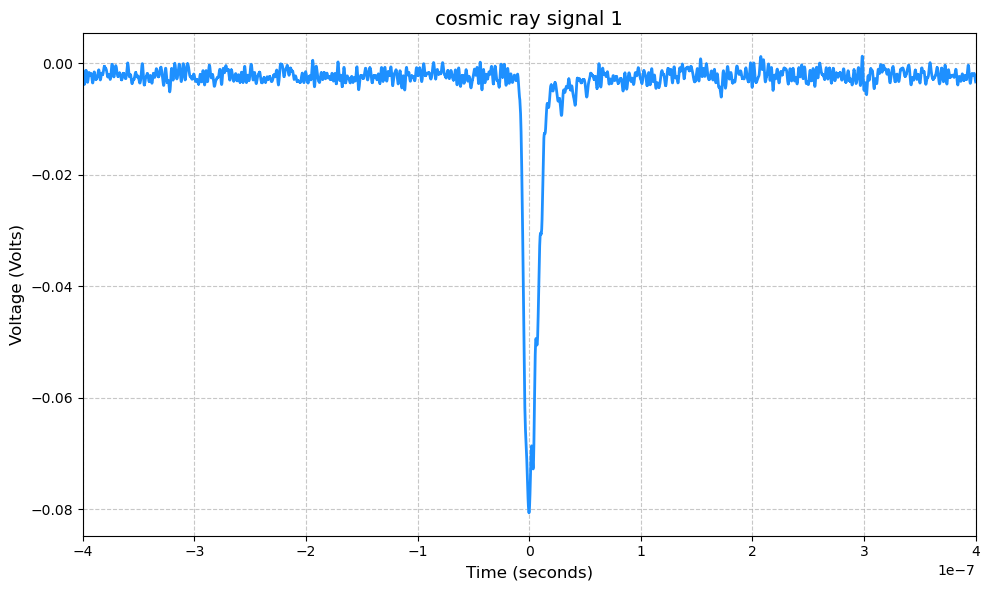

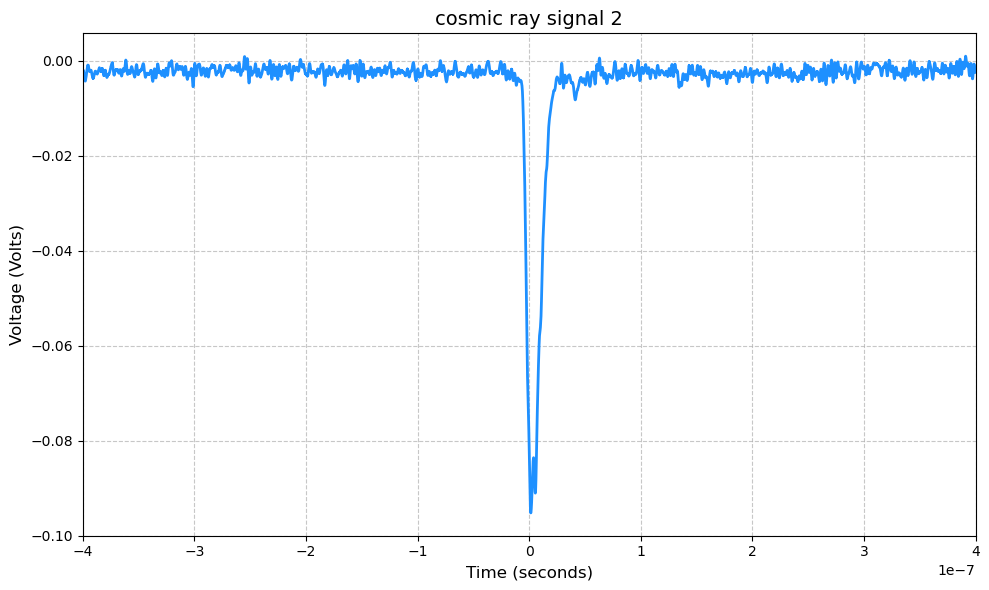

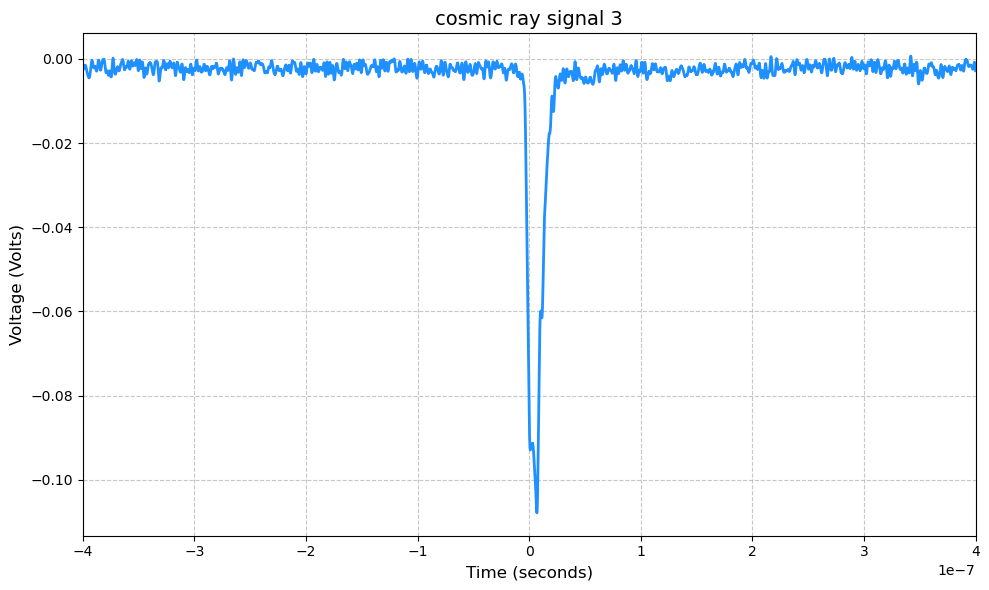

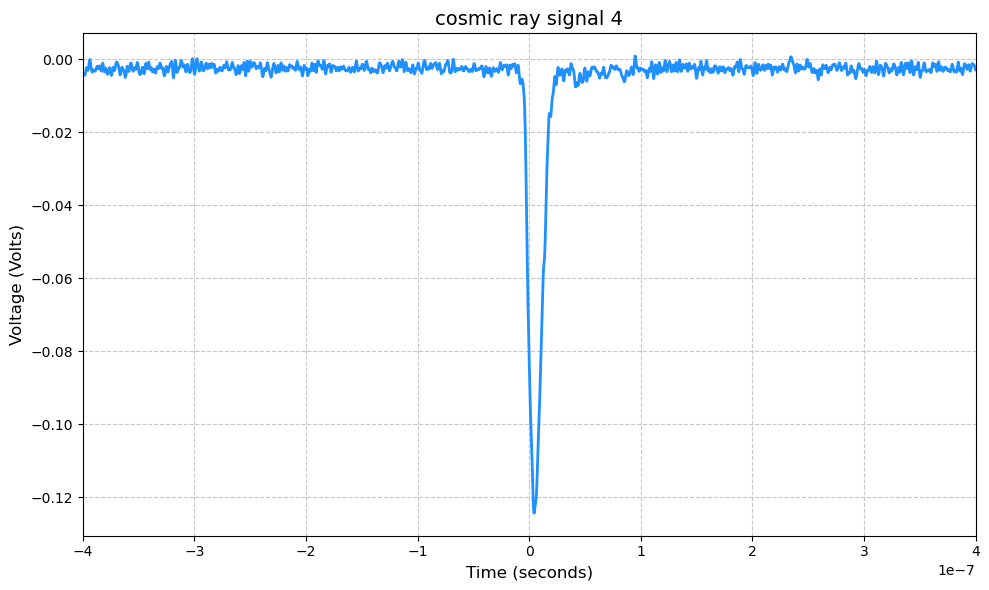

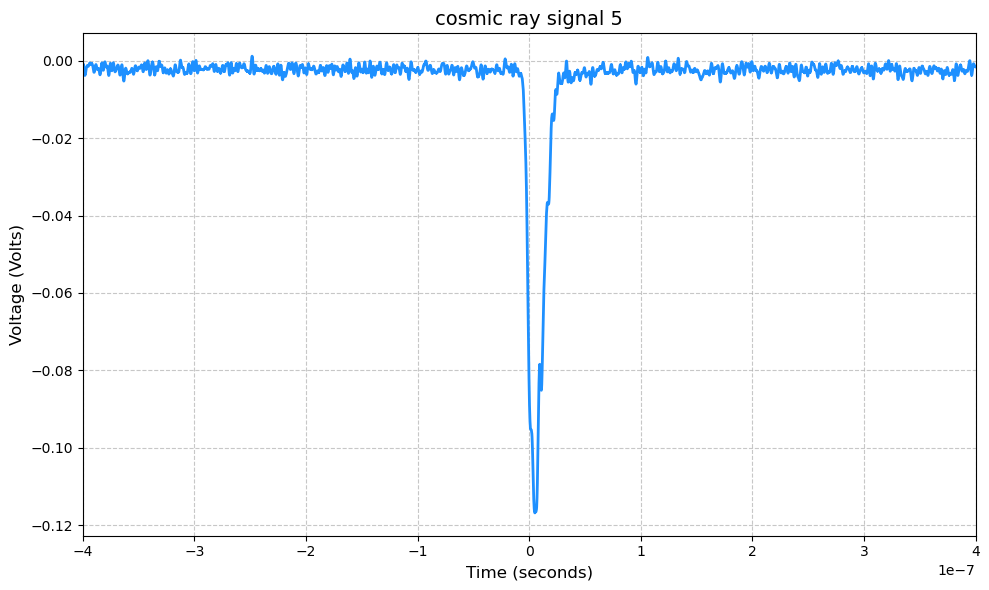

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import re

file_paths = ['./4-100001.csv', './4-100002.csv', './4-100003.csv', './4-100004.csv', './4-100005.csv']

for i, file_path in enumerate(file_paths):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data_start = False
    data_lines = []
    for line in lines:
        if line.startswith("Data:"):
            data_start = True
            continue 
        if data_start == True:
            if line.strip():   
                data_lines.append(line.strip())
    


    data = [list(map(float, re.split(r',', line))) for line in data_lines]
    
    

    df = pd.DataFrame(data, columns=['X', 'Y'])    

    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    
    ax.plot(df['X'], df['Y'], label=f'Data from {file_path}', linewidth=2, color='dodgerblue')
    ax.set_title(f'cosmic ray signal {i+1}', fontsize=14)
    ax.set_xlabel('Time (seconds)', fontsize=12)
    ax.set_ylabel('Voltage (Volts)', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlim(-4e-7, 4e-7)
    
    plt.tight_layout()
    plt.savefig(f'plot_{i+1}.png', dpi=300)
    plt.show()
    plt.close(fig) 